In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 5                #number of agents
N_buckets = 50              #number of buckets
max_turns = 100             #max number of moves in single game
sabotage_buckets = True     #sabaotage some buckets when true
rn_seed = 15                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize environment
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents, sabotage_buckets=sabotage_buckets)
print 'environment = ', environment

environment =  {'sabotage_buckets': True, 'max_turns': 100, 'N_agents': 5, 'rn_seed': 15, 'N_buckets': 50, 'bucket_params': {'p0': array([ 0.        ,  0.00040816,  0.00081633,  0.00122449,  0.00163265,
        0.00204082,  0.00244898,  0.00285714,  0.00326531,  0.00367347,
        0.00408163,  0.0044898 ,  0.00489796,  0.00530612,  0.00571429,
        0.00612245,  0.00653061,  0.00693878,  0.00734694,  0.0077551 ,
        0.00816327,  0.00857143,  0.00897959,  0.00938776,  0.00979592,
        0.01020408,  0.01061224,  0.01102041,  0.01142857,  0.01183673,
        0.0122449 ,  0.01265306,  0.01306122, -0.02020408, -0.02081633,
       -0.02142857, -0.02204082, -0.02265306,  0.0155102 ,  0.01591837,
        0.01632653,  0.01673469,  0.01714286,  0.01755102,  0.01795918,
        0.01836735,  0.01877551,  0.01918367,  0.01959184,  0.02      ]), 'sigma': array([ 0.        ,  0.00061224,  0.00122449,  0.00183673,  0.00244898,
        0.00306122,  0.00367347,  0.00428571,  0.00489796,  0.0055

In [6]:
#initialize state
state = initialize_state(environment)
print 'state = ', state

state =  {'agent_value': array([ 1.,  1.,  1.,  1.,  1.]), 'previous_bucket_productivity': array([ 0.        ,  0.00109886,  0.00095558,  0.00222489, -0.00324882,
       -0.00323952, -0.0018263 ,  0.00988127, -0.00207737,  0.00033532,
        0.0091629 ,  0.00707712,  0.00632492,  0.01128032,  0.00314837,
       -0.00040695,  0.0047203 ,  0.01217066, -0.00066704, -0.00089289,
        0.01025118,  0.00223257, -0.01213685,  0.00694571,  0.03564486,
        0.02727971, -0.01810426,  0.01147315, -0.00868284,  0.0207932 ,
        0.01147075,  0.01946399,  0.01459767, -0.03393225, -0.04939758,
       -0.00277176, -0.0528562 , -0.05946199,  0.00316428, -0.00331729,
        0.02529677,  0.04331163, -0.03127757,  0.02113501,  0.04175482,
        0.0512123 ,  0.03307545,  0.0071737 ,  0.03237073,  0.04464767]), 'agent_locations': array([ 2, 34,  5, 34, 11]), 'bucket_productivity': array([ 0.        , -0.00047019, -0.00124865, -0.00174378,  0.00364146,
        0.00143039, -0.00072526,  0.00521862

In [7]:
#move an agent
agent = 1
action = 2
state_next = update_agents(state, agent, action, environment)
print 'state_next = ', state_next
reward = get_reward(state_next)
print 'reward = ', reward
turn = 0
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state
state_vector_next = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

state_next =  {'agent_value': array([ 0.99875135,  0.99875135,  1.00143039,  0.96556262,  1.0097983 ]), 'previous_bucket_productivity': array([ 0.        , -0.00047019, -0.00124865, -0.00174378,  0.00364146,
        0.00143039, -0.00072526,  0.00521862,  0.01270784,  0.00611973,
        0.00056697,  0.0097983 ,  0.01312051,  0.01740987,  0.00961038,
        0.01481859,  0.00656863,  0.00752191,  0.02596715,  0.00438829,
        0.02366734, -0.00961684,  0.05174162,  0.00498502,  0.02162646,
        0.01703556,  0.01470438,  0.01490616,  0.02604423,  0.01812728,
        0.00562447,  0.02891128,  0.00080052,  0.00111972, -0.03443738,
       -0.01456095, -0.01657322, -0.0330689 ,  0.01353533, -0.01598811,
        0.02279459,  0.04690838, -0.01292708, -0.01797674,  0.04494007,
        0.02849825,  0.0532139 , -0.00436878,  0.03982069,  0.03006224]), 'agent_locations': array([ 2,  2,  5, 34, 11]), 'bucket_productivity': array([ 0.        ,  0.00070968,  0.00134289,  0.00090326,  0.00261575,

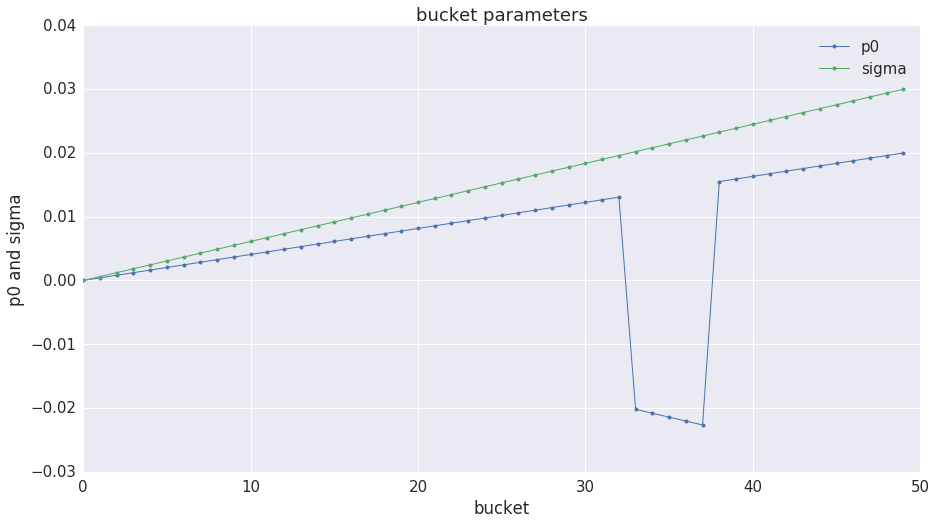

In [8]:
#plot p0 and sigma:
p0 = environment['bucket_params']['p0']
sigma = environment['bucket_params']['sigma']
xp = np.arange(len(p0))
yp = p0
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('bucket parameters')
p = ax.set_xlabel('bucket')
p = ax.set_ylabel('p0 and sigma')
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='p0')
yp = sigma
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='sigma')
p = ax.legend()

In [9]:
#play one game of randomly-moving agents and stash history in dataframe
strategy = 'random'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
print 'number of memories = ', len(memories)
reward_history.head()

number of memories =  101


,turn,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4
0,0,44,5.077158,1.019470,1.052230,0.939984,1.014053,1.051421
1,1,46,5.123617,1.001550,1.111496,0.916553,1.019203,1.074814
2,2,49,5.207282,1.009491,1.169547,0.924049,1.009407,1.094787
3,3,38,5.340108,1.041652,1.190828,0.935201,1.063110,1.109317
4,4,49,5.526762,1.059281,1.234486,0.997649,1.051955,1.183391


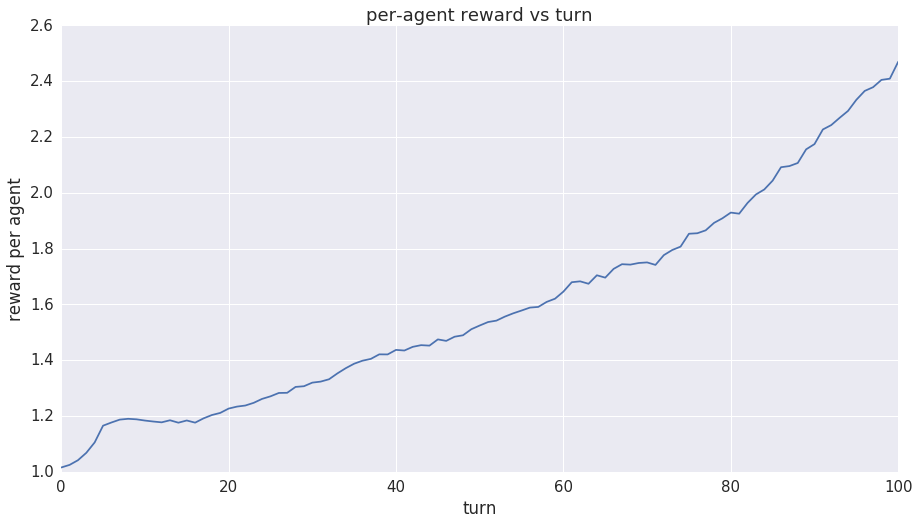

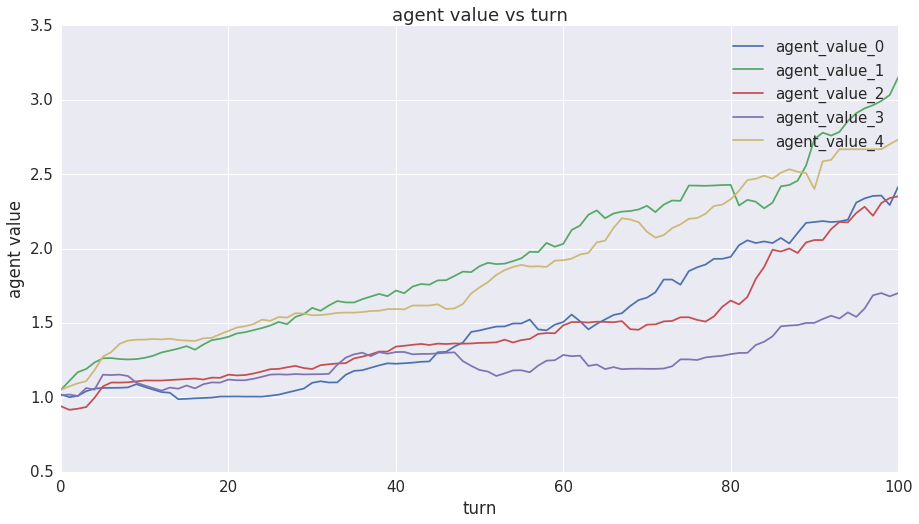

In [10]:
#plot per-agent reward versus turn, and agent values vs turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

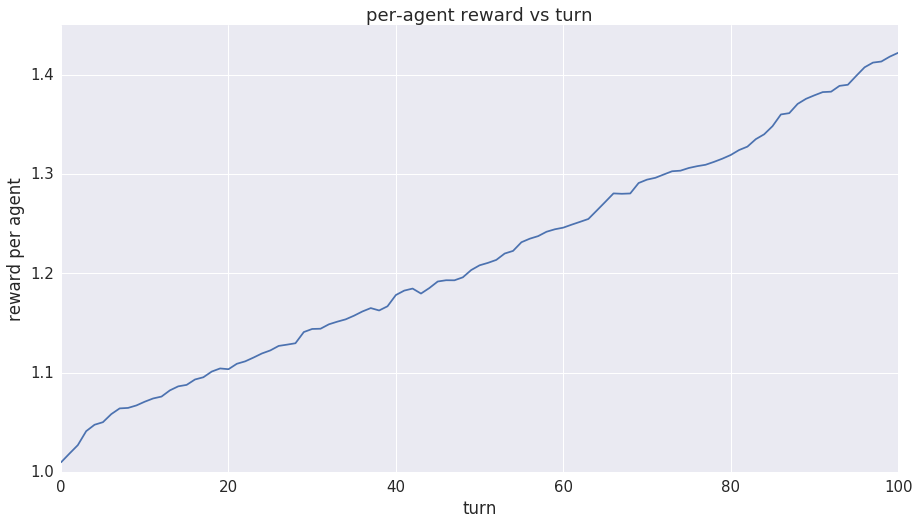

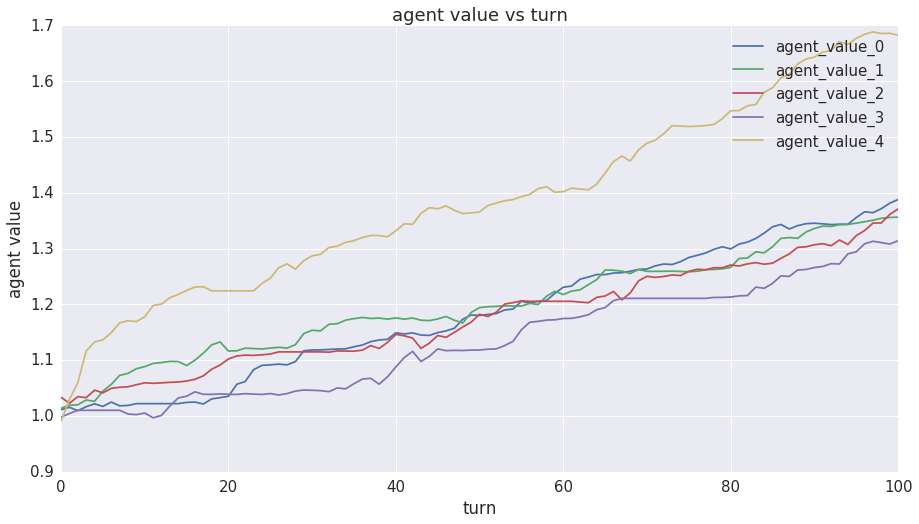

In [11]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

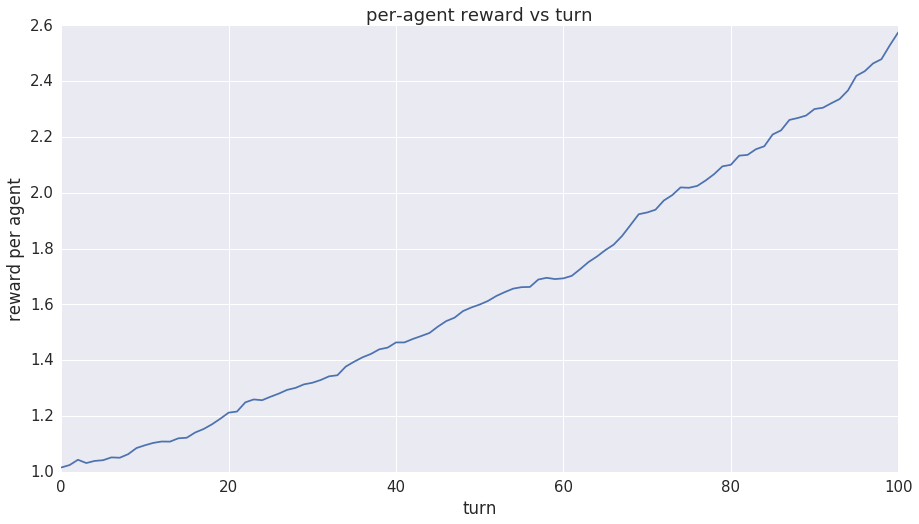

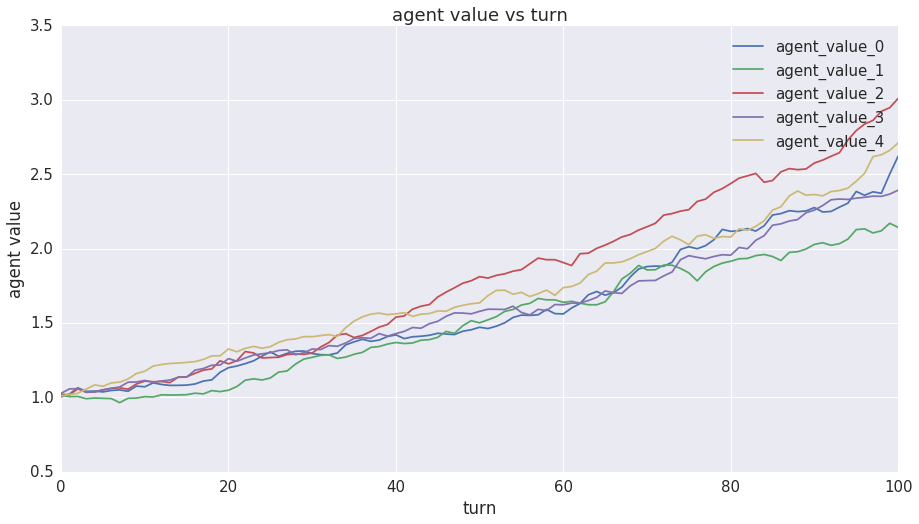

In [12]:
#play a middle-risk, middle-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

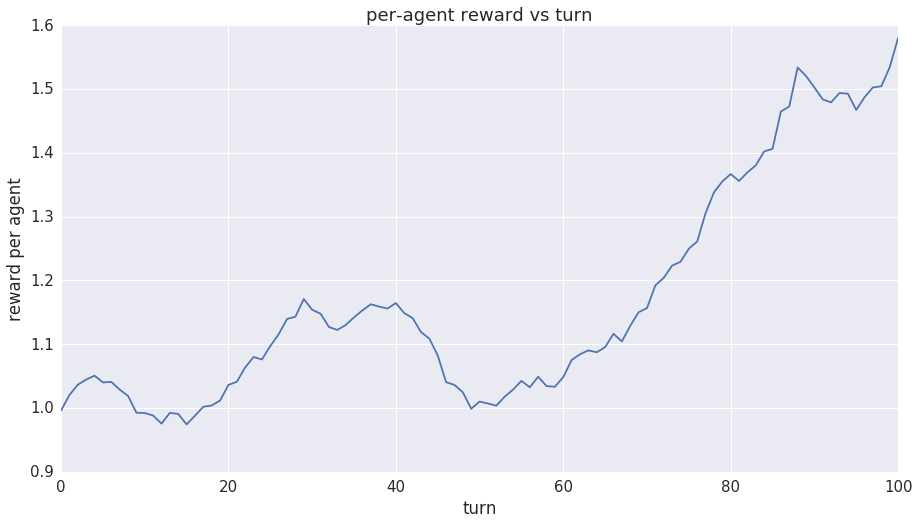

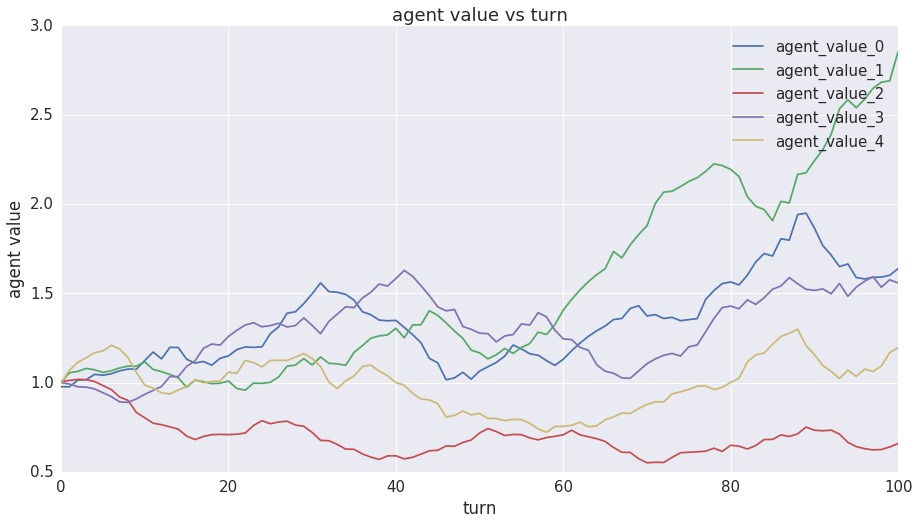

In [13]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [14]:
#play 20 games using various strategies, and generate stats for each strategy
N_games = 20
strategies = ['low', 'middle', 'random', 'high']#, 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

strategy =  low
strategy =  middle
strategy =  random
strategy =  high


mean       std
strategy turn                    
random   96    9.450195  0.339591
         97    9.525473  0.343224
         98    9.591503  0.348323
         99    9.636975  0.354761
         100   9.690413  0.359963

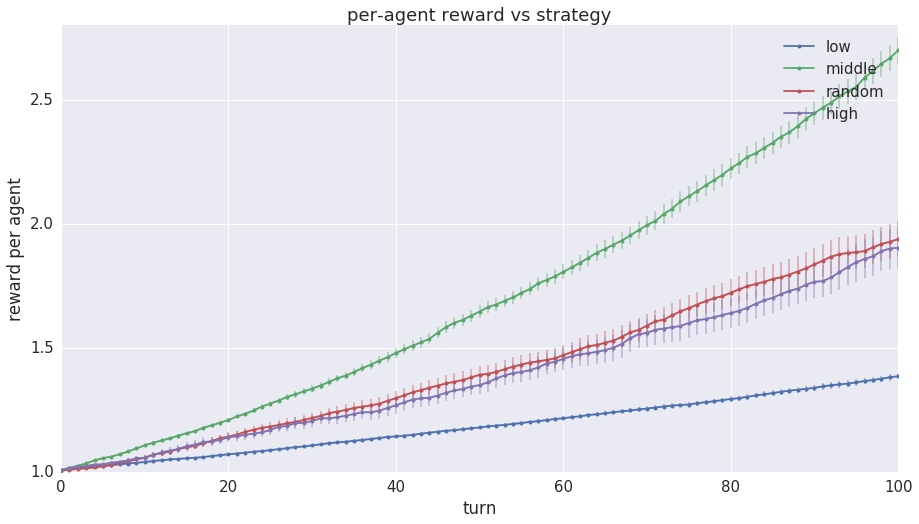

In [15]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [16]:
#play 200 random games and store moves in memories queue
N_games = 1000                  #set=0.1*N_training_games*batch_size/max_turns
strategy = 'random'
memories_list = []
N_memories = 0
for N_game in range(N_games):
    memories = play_game(environment, strategy)
    memories_list += [memories]
    N_memories += len(memories)
memories = deque(maxlen=N_memories)
for game_memories in memories_list:
    for m in game_memories:
        memories.append(m)
print 'number of memories = ', len(memories)

number of memories =  101000


In [17]:
#build model
state_vector = state2vector(state, environment)
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = 10*N_buckets
model = build_model(N_inputs, N_neurons, N_outputs)
print 'N_agents = ', N_agents
print 'N_buckets = ', N_buckets
print 'N_inputs = ', N_inputs
print 'N_neurons = ', N_neurons
print model.summary()

Using TensorFlow backend.


N_agents =  5
N_buckets =  50
N_inputs =  105
N_neurons =  500
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               53000     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 50)                12550     
Total params: 190,800
Trainable params: 190,800
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#train model
N_training_games = 2500                     #number of games played during training
N_validation_games = 5                   #number of smart games played after each training game
gamma = 0.85                               #discount for future rewards
batch_size = 10*max_turns                            #number of memories used during experience-replay
debug = False                              #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print '0.1*N_training_games*batch_size/max_turns', 0.1*N_training_games*batch_size/max_turns
print 'training model'
trained_model, games, epsilons, mean_validation_reward = \
    train(environment, model, N_training_games, N_validation_games, gamma, memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  2000
0.1*N_training_games*batch_size/max_turns 1000.0
training model
.

/usr/local/lib/python2.7/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... 
training done


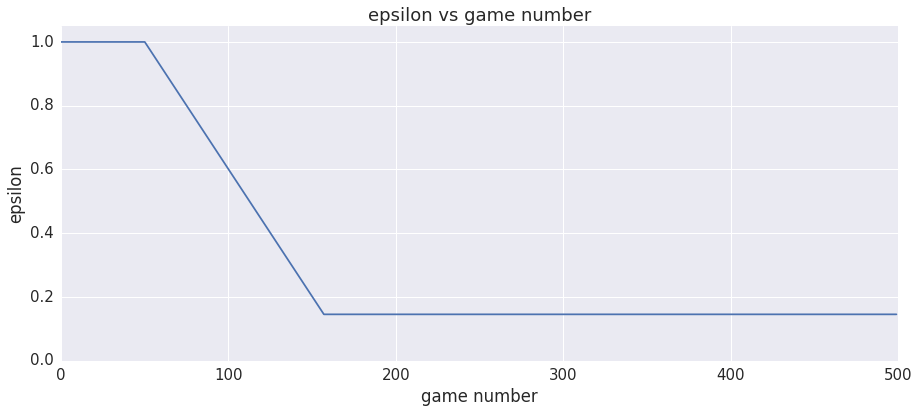

In [19]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = epsilons
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')
p = ax.set_ylim(0.0, 1.05)

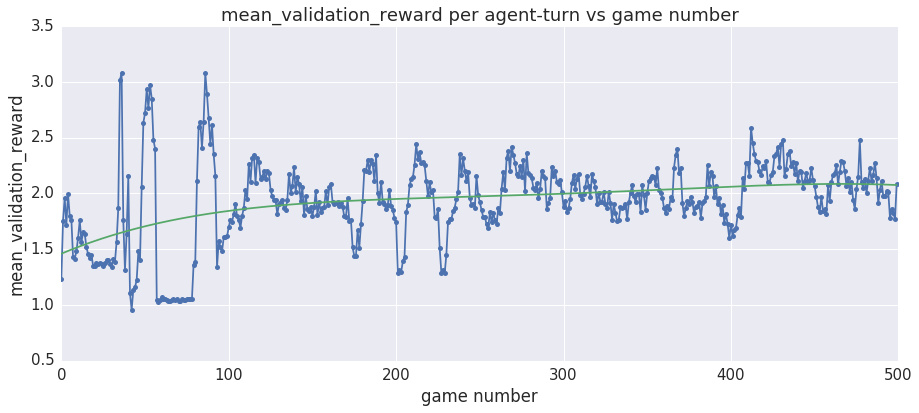

In [20]:
#plot median_validation_rewards vs validation game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = mean_validation_reward/N_agents/max_turns
p = ax.plot(xp, yp, marker='o', linestyle='-', markersize=5)
p = ax.set_title('mean_validation_reward per agent-turn vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('mean_validation_reward')
import numpy.polynomial.polynomial as poly
coefs = poly.polyfit(xp, yp, 4)
yp_fit = poly.polyval(xp, coefs)
p = ax.plot(xp, yp_fit)

In [21]:
#stop-notebook

array([14, 27, 27, 14, 27, 27, 14, 27, 27, 14])

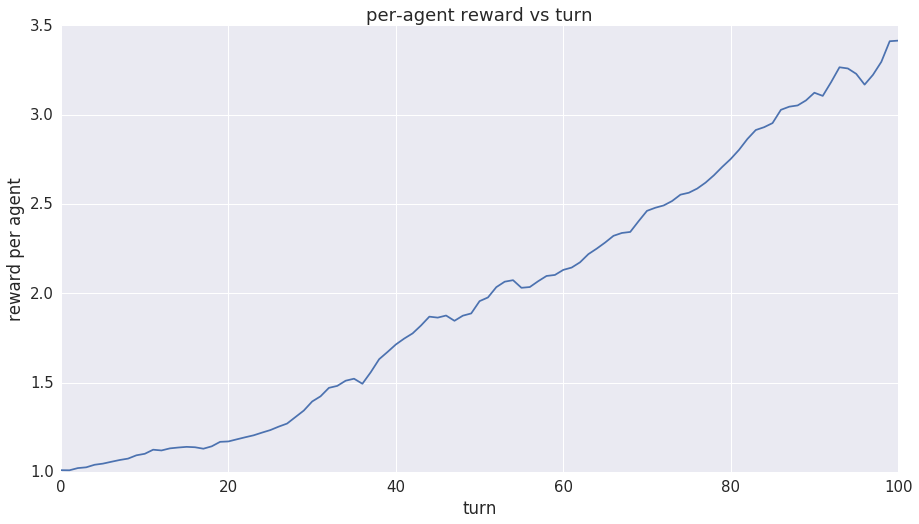

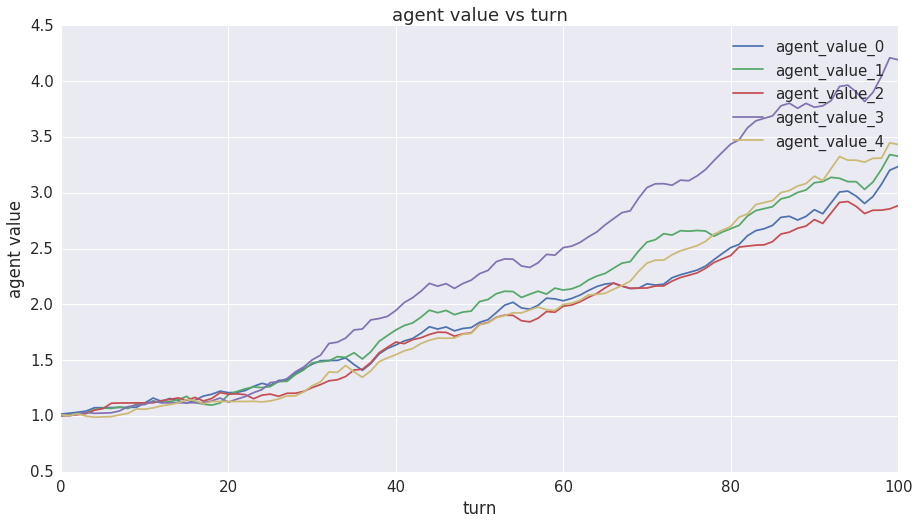

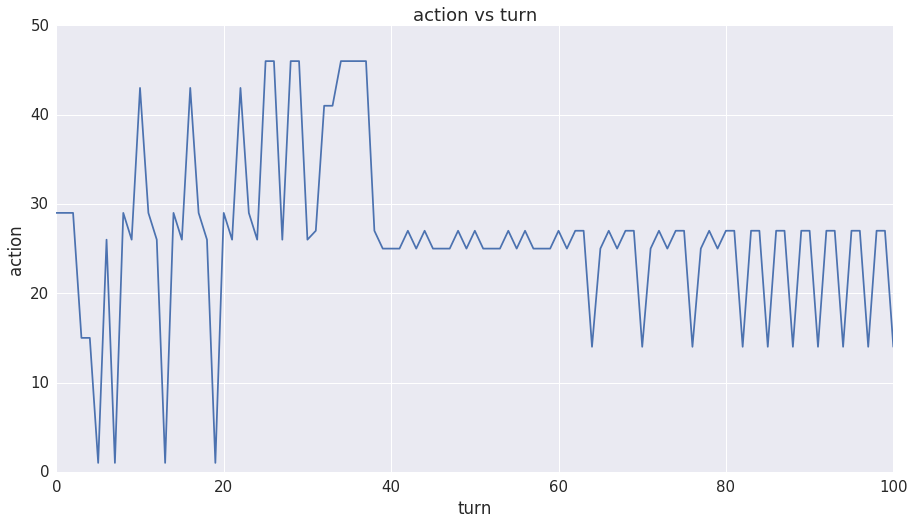

In [22]:
#play smart game using trained model to select best action
strategy = 'smart'
memories = play_game(environment, strategy, model=model)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()
#plot action vs turn
xp = df['turn']
yp = df['action']
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('action vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('action')
p = ax.set_ylim(0, N_buckets)
p = ax.plot(xp, yp)
yp.values[-10:]

strategy =  low
strategy =  middle
strategy =  high
strategy =  smart
strategy =  best


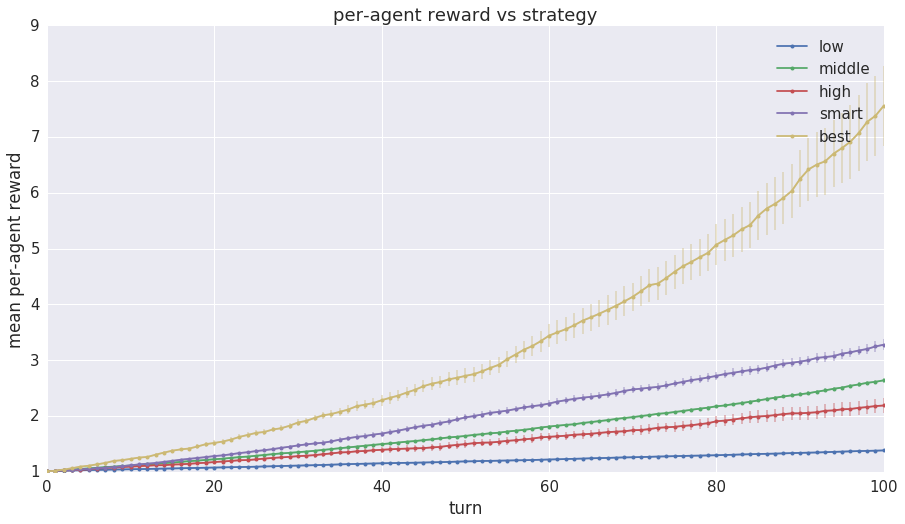

In [23]:
#play 10 games using various strategies and plot outcomes
N_games = 20
strategies = ['low', 'middle', 'high', 'smart', 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy, model=model)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean per-agent reward')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [24]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

execution time (minutes) =  6.45351081292
